In [1]:
#Import the required libraries and dataset

# Import the breast cancer dataset from sklearn
from sklearn.datasets import load_breast_cancer

# Import the standard scaler to normalize the dataset before applying PCA
from sklearn.preprocessing import StandardScaler

# Import PCA for dimensionality reduction
from sklearn.decomposition import PCA

# Import logistic regression for classification modeling
from sklearn.linear_model import LogisticRegression

# Import train_test_split to divide the dataset into training and test sets
from sklearn.model_selection import train_test_split

# Import metrics to evaluate the classification performance
from sklearn.metrics import classification_report, accuracy_score

# Import pandas for data manipulation and analysis
import pandas as pd

# Import matplotlib for plotting and visualizations
import matplotlib.pyplot as plt

# Import seaborn for enhanced data visualizations
import seaborn as sns



In [2]:
# Load cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y


*Data Scaling:*
   - `StandardScaler()`: Initializes a standard scaler to standardize the features. This is crucial for PCA as it's sensitive to feature scales


In [3]:
#Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
# Determine optimal number of components for PCA using explained variance ratio
pca = PCA()
pca.fit(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

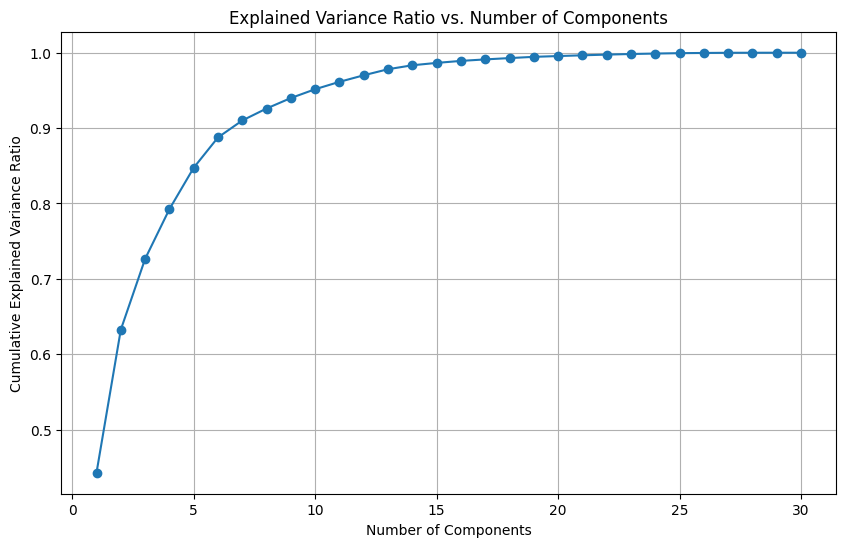

In [5]:
# Plot explained variance ratio to find elbow point (optimal number of components)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Explained Variance Ratio vs. Number of Components")
plt.grid(True)
plt.show()

 Apply PCA (Dimensionality Reduction to 2 components)


In [6]:
#Reducing the data to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y


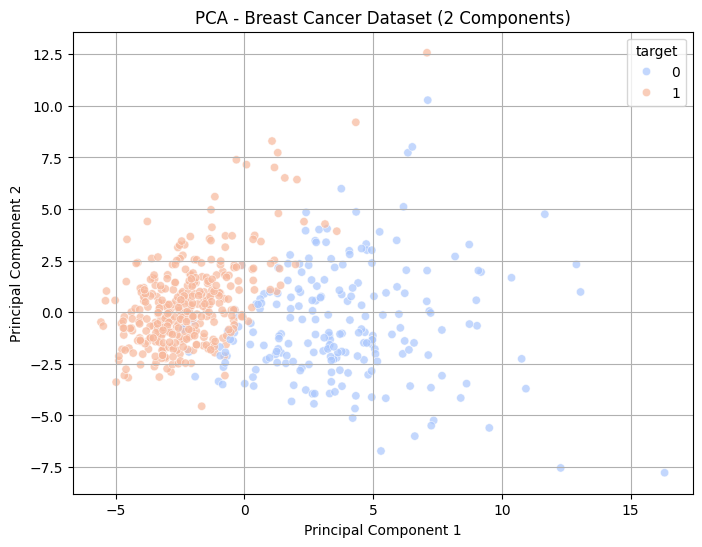

In [13]:
#Visualize the PCA Results
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', palette='coolwarm', alpha=0.7)
plt.title('PCA - Breast Cancer Dataset (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


**Logistic Regression with PCA Components**

In [8]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)



In [9]:
# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [10]:
# Predict
y_pred = model.predict(X_test)



In [11]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9912280701754386
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



The accuracy score of 0.9912 means the model correctly predicted 99.12% of the breast cancer diagnoses on the test set.

It’s a strong performance, especially considering that the model tend to reduce the features from from 30 down to just 2 principal components!

